# Assignment 10, Machine Learning Summer Term 2018, Uni Freiburg 

------------------------------
As a reminder of our syntax during the assignment, you will see __Tasks__ and __Questions__.

__Tasks__ are the steps you should follow to find the solution. 

__Questions __ are important concepts of the lecture. Answers to __Questions __ should be given in the notebook such that you can upload them together with your implementations to your git repository.


## Exercise 10.1: Pen & Paper: Backpropagation

In the first exercise you will calculate the gradients for a different feed-forward architecture with traditional methods in [10.1 Pen & Paper: Backpropagation](10.1 Pen and Paper Backpropagation-Solution.ipynb).

## Exercise 10.2: Implementing Backpropagation

This exercise helps you to implement a multi-layer perceptron as described in the lecture and use it on the Boston Housing dataset. [10.2 Implementing Backpropagation](10.2 Implementing Backpropagation-Solution.ipynb).

## Exercise 10.3: Neural Network Playground

To get a feel what neural networks can do and what differences all the options make, Daniel Smilkov and Shan Carter have implemented a great web visualization tool for Google's TensorFlow library: [Neural Network Playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.15251&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false).

**Q 10.3.1: What does the decision boundary for a classification problem look like if you use 3 hidden layers with linear activations? You can set the option to discretize the output, if the probabilistic version is hard to judge. Will more layers help?**

**Answer: ** A network with linear activations will always have a linear decision boundary. In the case of 2 dimensions, this is visible as a straight line. More layers will not help, because the decision boundary will still be linear. A simple example:

\begin{equation}
w_2 (w_1 x + b_1) + b_2 = w_2 w_1 x + w_2 b_1 + b_2
\end{equation}

You can see that after applying two linear layers, x is still only linearly transformed. Having non-linear activations is absolutely crucial to learn non-linear functions.

**Q 10.3.2: Set up a network with 6 hidden layers, 4 units each and learning rate of 0.3. Compare the training of sigmoid and rectified linear activations. What happens? Can you think of an explanation?**

**Answer: ** The sigmoid network will probably not learn at all, while the relu network quickly converges to an adequate solution. This is a problem called 'vanishing gradient' and has prevented training deep networks with many layers for a long time. The sigmoid function saturates very quickly for either small or large input, i.e. converges to 0 or 1. If you look at the plot below, you will see that derivative in these cases approaches 0. This makes the weight update very hard, as you require large learning rates to overcome saturation, but you will likely overshoot into the opposite direction. The problem becomes worse the more layers you add. Rectified linear units on the other hand always have a gradient of 1 for positive input allowing them to stack more easily.

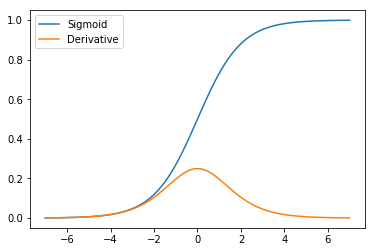

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

x = np.linspace(-7, 7, 400)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, sigmoid(x) * (1 - sigmoid(x)), label='Derivative')
plt.legend(loc='best')